# Find maxiumum temperature in each of the cities

In [1]:
import pandas as pd
df = pd.read_csv('07_cities_data.csv')
df

,day,city,temperature,windspeed,event
0,01/01/2024,peshawar,16,5,Rain
1,01/02/2024,peshawar,17,7,Sunny
2,01/03/2024,peshawar,20,3,Sunny
3,01/04/2024,peshawar,19,2,Cloudy
4,01/01/2024,Lahore,18,2,Sunny
5,01/02/2024,Lahore,20,4,Fog
6,01/03/2024,Lahore,24,1,Sunny
7,01/04/2024,Lahore,21,3,Cloudy
8,01/01/2024,London,3,10,Rain
9,01/02/2024,London,1,8,snow


In [3]:
g=df.groupby('city')
g

In [4]:
for city,city_df in g:
    print(city)
    print(city_df) # this function is for making 3 different field from the same data

Lahore
          day    city  temperature  windspeed   event
4  01/01/2024  Lahore           18          2   Sunny
5  01/02/2024  Lahore           20          4     Fog
6  01/03/2024  Lahore           24          1   Sunny
7  01/04/2024  Lahore           21          3  Cloudy
London
           day    city  temperature  windspeed   event
8   01/01/2024  London            3         10    Rain
9   01/02/2024  London            1          8    snow
10  01/03/2024  London            4          6  Cloudy
11  01/04/2024  London            2         11    snow
peshawar
          day      city  temperature  windspeed   event
0  01/01/2024  peshawar           16          5    Rain
1  01/02/2024  peshawar           17          7   Sunny
2  01/03/2024  peshawar           20          3   Sunny
3  01/04/2024  peshawar           19          2  Cloudy


In [5]:
# for a specific group to chose between them we can write:
g.get_group('London')

,day,city,temperature,windspeed,event
8,01/01/2024,London,3,10,Rain
9,01/02/2024,London,1,8,snow
10,01/03/2024,London,4,6,Cloudy
11,01/04/2024,London,2,11,snow


In [9]:
# the group we define earlier:
# g=df.groupby('city')
#g
# is similar to SQl group byte i-e SELECT * from city_data GROUP BY city.
# in sql we write functions like that to create table while in pandas we write the earlier function

In [6]:
g.max()

,day,temperature,windspeed,event
city,,,,
Lahore,01/04/2024,24,4,Sunny
London,01/04/2024,4,11,snow
peshawar,01/04/2024,20,7,Sunny


In [7]:
g.min()

,day,temperature,windspeed,event
city,,,,
Lahore,01/01/2024,18,1,Cloudy
London,01/01/2024,1,6,Cloudy
peshawar,01/01/2024,16,2,Cloudy


#we are first dividing our data set into different groups based on city and 
#then running analytics on each of these groups and then combining results into a single data frame.
# so this of dividing your data into multiple groups & then applying some analytics to get 
# aggregated result is called split apply combine

In [10]:
numeric_columns = df.select_dtypes(include='number').columns
g[numeric_columns].mean()

,temperature,windspeed
city,,
Lahore,20.75,2.50
London,2.50,8.75
peshawar,18.00,4.25


In [11]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
Lahore           4.0  20.75  2.500000  18.0  19.50  20.5  21.75  24.0   
London           4.0   2.50  1.290994   1.0   1.75   2.5   3.25   4.0   
peshawar         4.0  18.00  1.825742  16.0  16.75  18.0  19.25  20.0   

         windspeed                                               
             count  mean       std  min   25%  50%    75%   max  
city                                                             
Lahore         4.0  2.50  1.290994  1.0  1.75  2.5   3.25   4.0  
London         4.0  8.75  2.217356  6.0  7.50  9.0  10.25  11.0  
peshawar       4.0  4.25  2.217356  2.0  2.75  4.0   5.50   7.0

city
Lahore      Axes(0.125,0.11;0.775x0.77)
London      Axes(0.125,0.11;0.775x0.77)
peshawar    Axes(0.125,0.11;0.775x0.77)
dtype: object

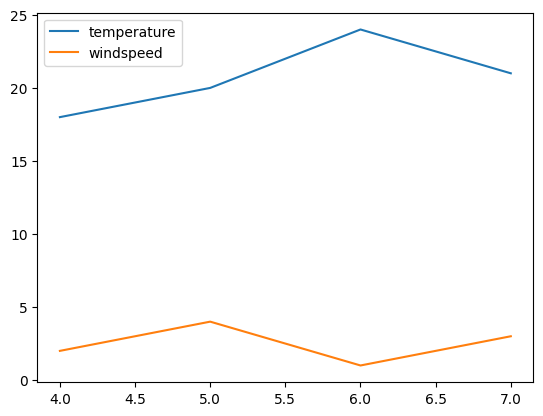

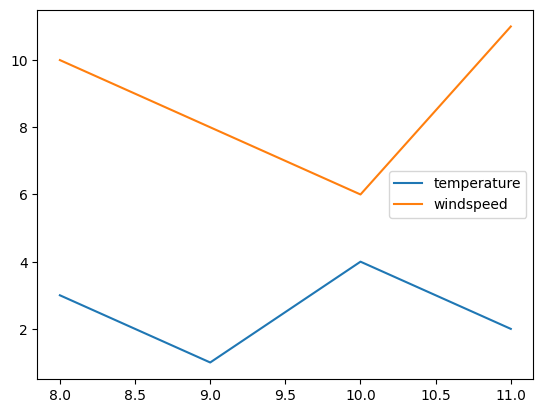

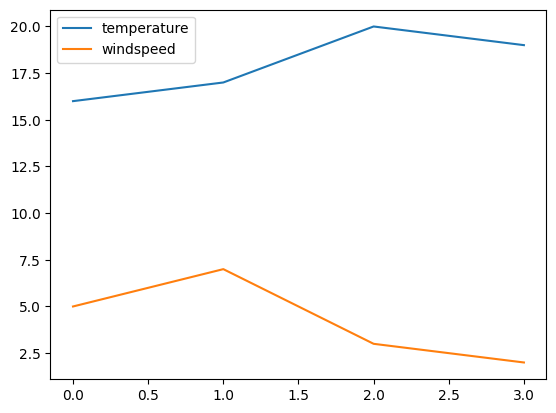

In [12]:
%matplotlib inline
g.plot()